In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np


In [2]:
plans2015=pd.read_excel("PY2015_Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [3]:
NM2015=pd.read_excel("PY2015_NM-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
NV2015=pd.read_excel("PY2015_NV-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
OR2015=pd.read_excel("PY2015_OR-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [4]:
plans2015=plans2015.append(NM2015)
plans2015=plans2015.append(NV2015)
plans2015=plans2015.append(OR2015)

In [5]:
Edu = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S1501_with_ann.csv", skiprows=1)
Uninsured=pd.read_csv("Texas Health Insurance/ACS_15_5YR_S2701_with_ann.csv", skiprows=1)
Pop = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S0101_with_ann.csv", skiprows=1)
Employment = pd.read_csv("Texas Health Insurance/ACS_15_5YR_DP03_with_ann.csv", skiprows=1)
HealthRankings=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Ranked Measure Data", skiprows=1)
HealthRankings2=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Additional Measure Data", skiprows=1)

In [6]:
hospitals=pd.read_csv("tabula-hosplis2016.csv")
TXplans2015=plans2015[plans2015["State "]=="TX"]

In [7]:
hospitals=hospitals[["Facility", "County", "Beds", "Beds.1", "Ownership"]]
hospitals=hospitals.rename(columns={"Beds.1":"Psychiatric Beds"})


In [8]:
f=[]
for i in hospitals["County"]:
    r=i.split()
    for j in range(len(r)):
        if not r[j].isdigit():
            f.append(r[j])
            
for k in range(len(f)):
    f[k]=f[k].title()

result=[]
for l in range(len(f)):
    result.append("".join([m for m in f[l] if not m.isdigit()]))
    
print(result)

['Taylor', '-', 'Taylor', '-', 'Taylor', '-', 'Taylor', '-', 'Taylor', 'Taylor', 'Dallas', '-', 'Jim', 'Wells', '-', 'Collin', '-', 'Collin', 'Brewster', '-', 'Potter', '-', 'Potter', '-', 'Potter', '-', 'Potter', 'Potter', '-', 'Potter', 'Randall', 'Chambers', '-', 'Andrews', '-', 'Jones', '-', 'San', 'Patricio', 'Tarrant', 'Tarrant', '-', 'Tarrant', '-', 'Tarrant', '-', 'Tarrant', 'Tarrant', '-', 'Tarrant', '-', 'Tarrant', '-', 'Tarrant', 'Tarrant', '-', 'Tarrant', '-', 'Stonewall', '-', 'Henderson', '-', 'Denton', 'Travis', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', '-', 'Travis', 'Travis', 'Travis', 'Travis', '-', 'Travis', 'Travis', 'Tarrant', '-', 'Runnels', '-', 'Matagorda', '-', 'Harris', '-', 'Harris', 'Jefferson', '-', 'Jefferson', '-', 'Jefferson', '-', 'Jefferson', '-', 'Jefferson', '-

In [9]:
x=[]
for i, row in Edu["Geography"].iteritems():
    x.append(row.strip().split()[0])
    
Edu["County"]=pd.Series(x)
Edu=Edu[["County", "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings", "Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Associate's degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher"]]

In [10]:
y=[]
for i, row in Uninsured["Geography"].iteritems():
    y.append(row.strip().split()[0])
    
Uninsured["County"]=pd.Series(y)
Uninsured=Uninsured[["County", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years"]]

In [11]:
z=[]
for i, row in Employment["Geography"].iteritems():
    z.append(row.strip().split()[0])
    
Employment["County"]=pd.Series(z)
Employment=Employment[["County", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)"]]

In [12]:
HealthRankings=HealthRankings[["County", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems"]]
HealthRankings2=HealthRankings2[["County", "% Hispanic", "% African American", "% Rural", "% Diabetic", "HIV Prevalence Rate", "Age-Adjusted Mortality", "% Food Insecure", "Costs"]]

In [13]:
BronzeTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Bronze"]
SilverTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Silver"]
GoldTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Gold"]

DependentSilver=TXplans2015[["Metal Level", "Issuer Name", "Plan ID (standard component)", "Plan Type",  "Rating Area", "County", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard"]]
DependentSilver["Premium Adult Individual Age 27"]=DependentSilver["Premium Adult Individual Age 27"].astype(str).astype(float)

NumberOfIssuersSilver=DependentSilver.groupby(["Metal Level", "Rating Area", "County"])["Issuer Name"].nunique().reset_index()
NumberOfSilverPlans=DependentSilver.groupby(["Rating Area", "County"])["Plan ID (standard component)"].nunique().reset_index()
DependentSilver=pd.merge(DependentSilver, NumberOfIssuersSilver, how="left", on =["County"])
DependentSilver=pd.merge(DependentSilver, NumberOfSilverPlans, how="left", on =["County"])
DependentSilver=DependentSilver.rename(columns={"Metal Level_x":"Metal Level", "Issuer Name_x": "Issuer Name", "Rating Area_x": "Rating Area", "Issuer Name_y": "Number Of Insurers", "Plan ID (standard component)_y": "Number Of Plans"})

DependentSilver=DependentSilver[["Metal Level", "Issuer Name", "County", "Number Of Plans", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard", "Number Of Insurers"]]

DependentSilver

C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Metal Level,Issuer Name,County,Number Of Plans,Premium Adult Individual Age 27,Medical Deductible-individual-standard,Number Of Insurers
0,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
1,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
2,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
3,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
4,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,331.63,"$1,500",1
5,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,331.63,"$1,500",1
6,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,331.63,"$1,500",1
7,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,331.63,"$1,500",1
8,Silver,Blue Cross and Blue Shield of Texas,Anderson,18,267.73,"$6,000",1
9,Silver,Blue Cross and Blue Shield of Texas,Anderson,18,267.73,"$6,000",1


In [14]:
SilverModelDF=pd.merge(NumberOfSilverPlans, Edu)
SilverModelDF=pd.merge(SilverModelDF, Uninsured)
SilverModelDF=pd.merge(SilverModelDF, Employment)
SilverModelDF=pd.merge(SilverModelDF, HealthRankings)
SilverModelDF=pd.merge(SilverModelDF, HealthRankings2)

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


,Metal Level,Issuer Name,County,Number Of Plans,Premium Adult Individual Age 27,Medical Deductible-individual-standard,Number Of Insurers
0,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
1,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
2,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
3,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,321.77,"$3,250",1
4,Gold,Blue Cross and Blue Shield of Texas,Anderson,18,331.63,"$1,500",1


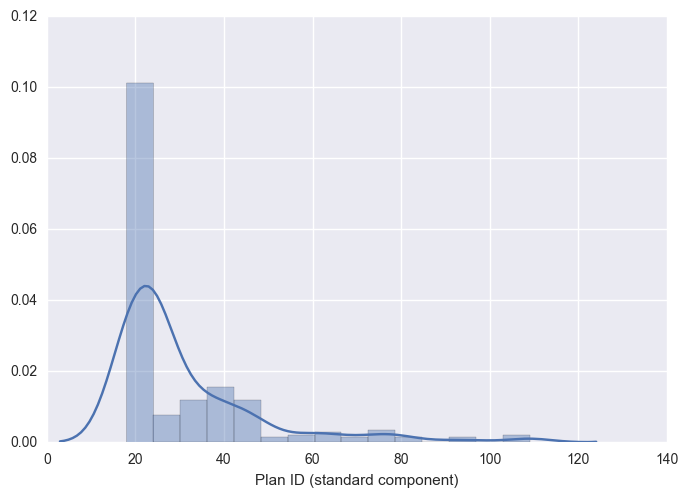

In [15]:

sns.distplot(SilverModelDF["Plan ID (standard component)"])
DependentSilver.head()

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


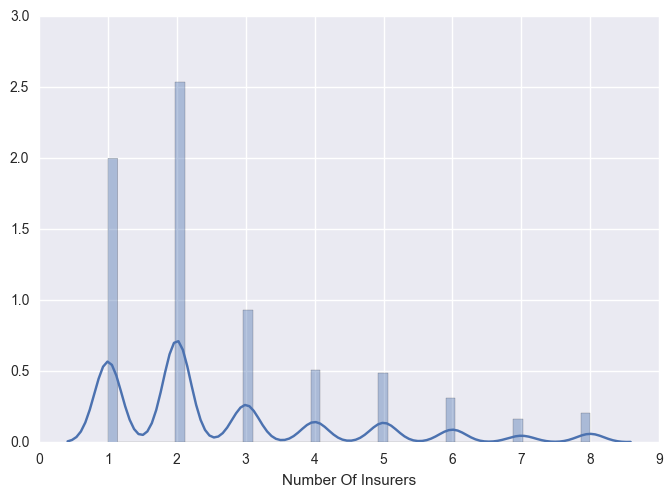

In [16]:
sns.distplot(DependentSilver["Number Of Insurers"])

In [ ]:
TXplans